<a href="https://colab.research.google.com/github/SebastianGomezViggiano/Computer-Vision/blob/main/Exam_CV_SGV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

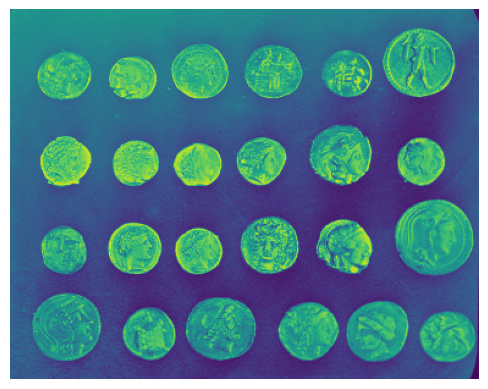

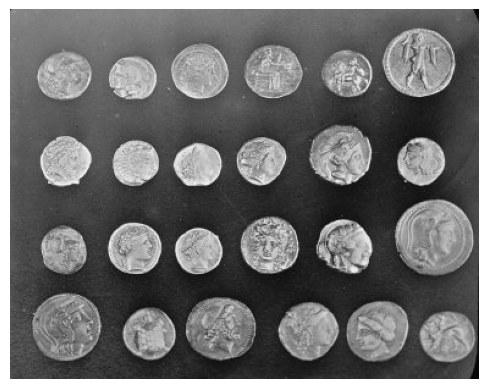

Image shape: (303, 384)
Pixel intensity range: 1 to 252


In [14]:
#Importing the needed libraries
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from skimage import data
import skimage as sk

matplotlib.rcParams['font.size'] = 18

#Import the coins images as in the Exercise 1
image = data.coins()

#Visualize the image
#Here false colors are applied since the image was in grayscale
plt.imshow(image)
plt.axis('off')
plt.show()

#Display in grayscale
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

#Size of image
print("Image shape:", image.shape)

#Range of the prixel grayscale levels
print("Pixel intensity range:", image.min(), "to", image.max())


## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

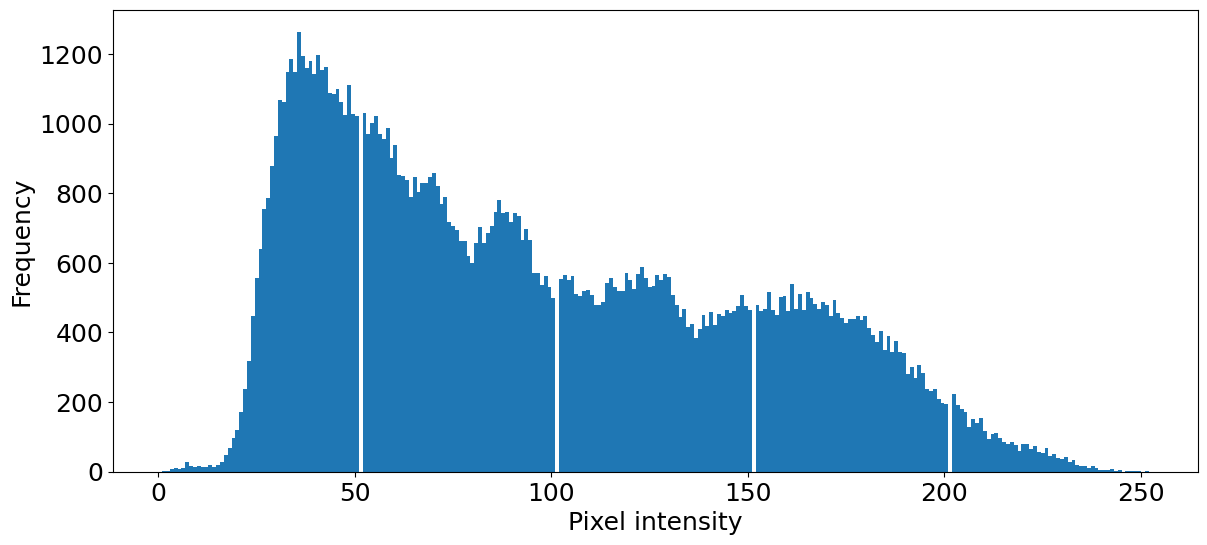

In [18]:
#Importing the needed libraries
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

#Loading coins image
image = data.coins()

# Reshape the uint8 image as 1d array
v = image.reshape(image.shape[0] * image.shape[1], 1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256, density=False)
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.show()

Now analyzing the peaks of the histogram in terms of regions of the image, we could idetify at least three differents zones:

1) A low-intensity peak going up to 50, that represent the pixels of the dark tones coming from the table behind the coins and the shadow that we could see in the background.

2) A middle tone that could be identify from 50 to 120 that would explain the parts of the coins that are not shinning.

3) And finaly a high-intensity peak, going from 50 up to the maximum intensity that represents the bright parts where the light reflects. As we can appreciate both in the image and the histogram they are fewer pixels that are bright.

## 3. Applied noise to the image and use the correct function to erase the noise.

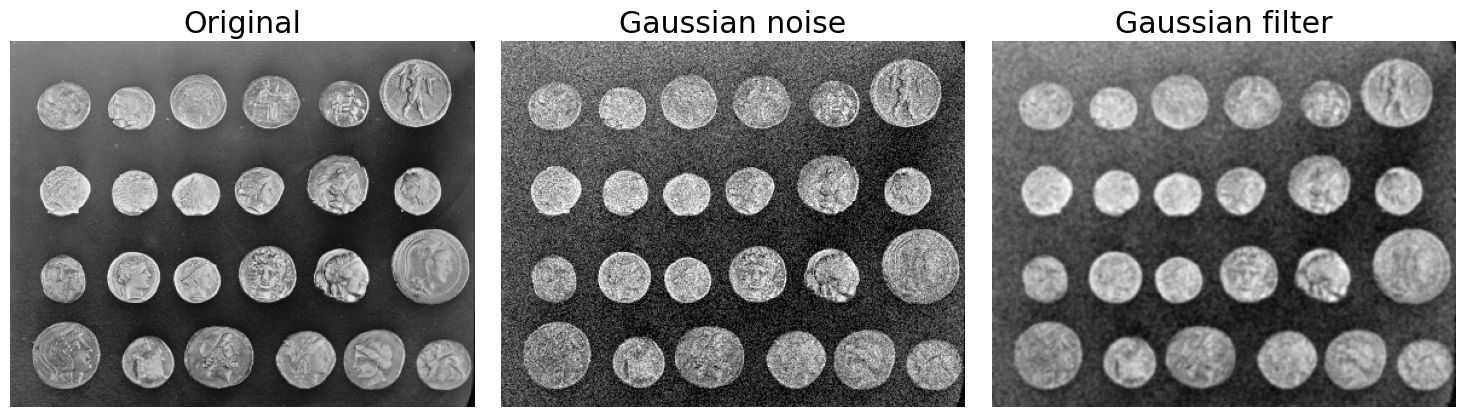

In [25]:
#Importing the needed libraries
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.filters import gaussian

# Load coins as floats in [0,1]
coins = img_as_float(data.coins())

#Choosing to add simple Gaussian noise (σ≈0.1)
noisy_coins = random_noise(coins, mode='gaussian', var=0.01)

#Choosing a Gaussian blur to remove noise
denoised_coins = gaussian(noisy_coins, sigma=1)

#Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(noisy_coins, cmap='gray')
axes[1].set_title('Gaussian noise')
axes[1].axis('off')

axes[2].imshow(denoised_coins, cmap='gray')
axes[2].set_title('Gaussian filter')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

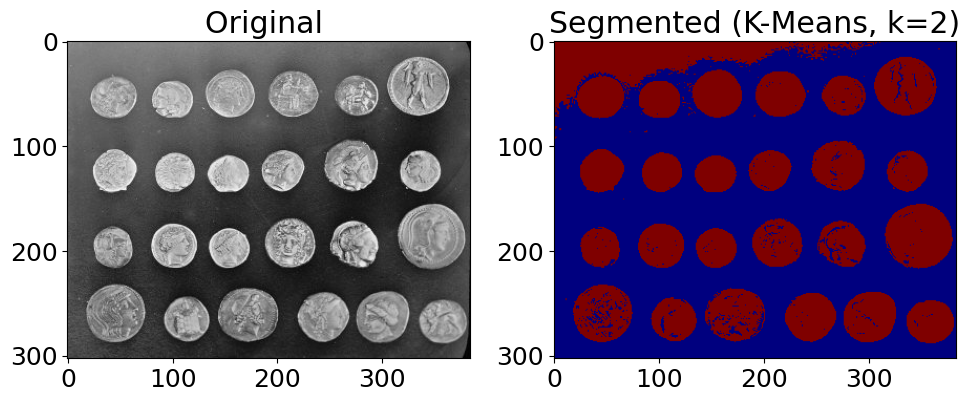

In [28]:
#Importing the needed libraries
import numpy as np
from sklearn.cluster import KMeans
from skimage import data
import matplotlib.pyplot as plt

# Loading coins image
image = data.coins()

# Convert the image to a 2D array
image_2D = image.reshape((-1, 1))

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)
segmented_image = kmeans.labels_.reshape(image.shape)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original ')

axes[1].imshow(segmented_image, cmap=plt.cm.jet)
axes[1].set_title('Segmented (K-Means, k=2)')


plt.tight_layout()
plt.show()

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

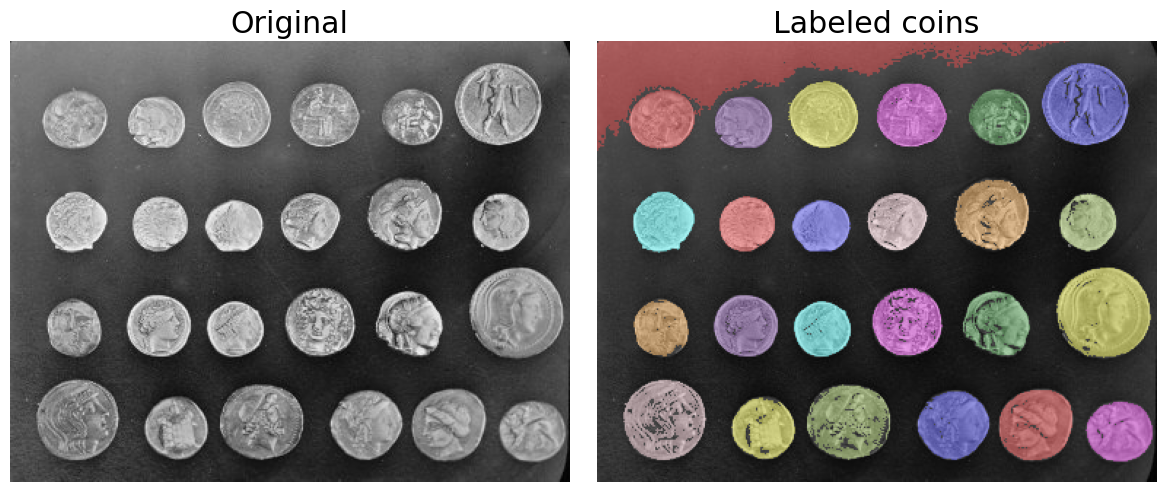

Number of coins found: 24


In [48]:
#Importing the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage import data, filters, morphology, measure, color, img_as_float
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the image
image = img_as_float(data.coins())

# Create a mask via Otsu
th = filters.threshold_otsu(image)
labels_mask = image > th

# Convert to 2D arrays
image_2D = image.reshape(-1, 1)
labels_1D = labels_mask.reshape(-1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    image_2D, labels_1D, test_size=0.2, random_state=0
)

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predict labels for the test image
pred_1D = classifier.predict(image_2D)

# Reshape back into image form
pred_mask = pred_1D.reshape(image.shape)

# Clean using the mask
pred_clean = morphology.remove_small_objects(pred_mask, min_size=200)

# Label connected components
labels = measure.label(pred_clean, connectivity=2)
num_coins = labels.max()

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(color.label2rgb(labels, image, bg_label=0))
axes[1].set_title(f'Labeled coins')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Number of coins found: {num_coins}")


## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

Average area:              1888.75 pixels
Average major axis length: 57.69 pixels
Average orientation:       0.10 radians


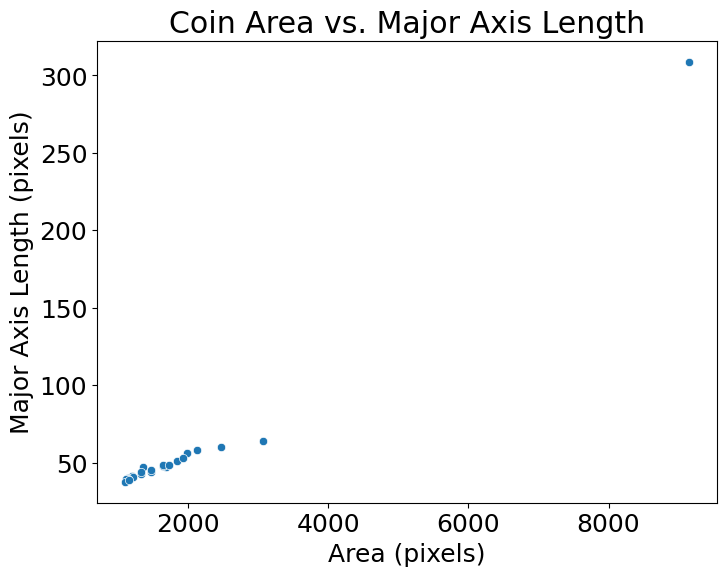

In [49]:
#Importing the needed libraries
import pandas as pd
from skimage import measure
import seaborn as sns
import matplotlib.pyplot as plt


# Extract area, major axis length and orientation from the labels
props = measure.regionprops_table(
    labels,
    properties=[
        'label',
        'area',
        'major_axis_length',
        'orientation'
    ]
)

df_features = pd.DataFrame(props)

# Average values
avg_area   = df_features['area'].mean()
avg_major  = df_features['major_axis_length'].mean()
avg_orient = df_features['orientation'].mean()

print(f"Average area:              {avg_area:.2f} pixels")
print(f"Average major axis length: {avg_major:.2f} pixels")
print(f"Average orientation:       {avg_orient:.2f} radians")

# Scatterplot: area vs. major axis length
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='area',
    y='major_axis_length',
    data=df_features
)
plt.xlabel('Area (pixels)')
plt.ylabel('Major Axis Length (pixels)')
plt.title('Coin Area vs. Major Axis Length')
plt.show()


## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [50]:
#Importing the needed libraries
import pandas as pd
from skimage import measure
import seaborn as sns
import matplotlib.pyplot as plt


# Extract area, major axis length and orientation from the labels
props = measure.regionprops_table(
    labels,
    properties=[
        'label',
        'area',
        'major_axis_length',
        'orientation'
    ]
)

df_features = pd.DataFrame(props)


# Identify coins with area > 1750 pixels
df_large_coins = df_features.loc[df_features['area'] > 1750]

# Counting
print('Number of coins greater than 1750 pixels is {}'.format(df_large_coins.shape[0]))

Number of coins greater than 1750 pixels is 7


##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

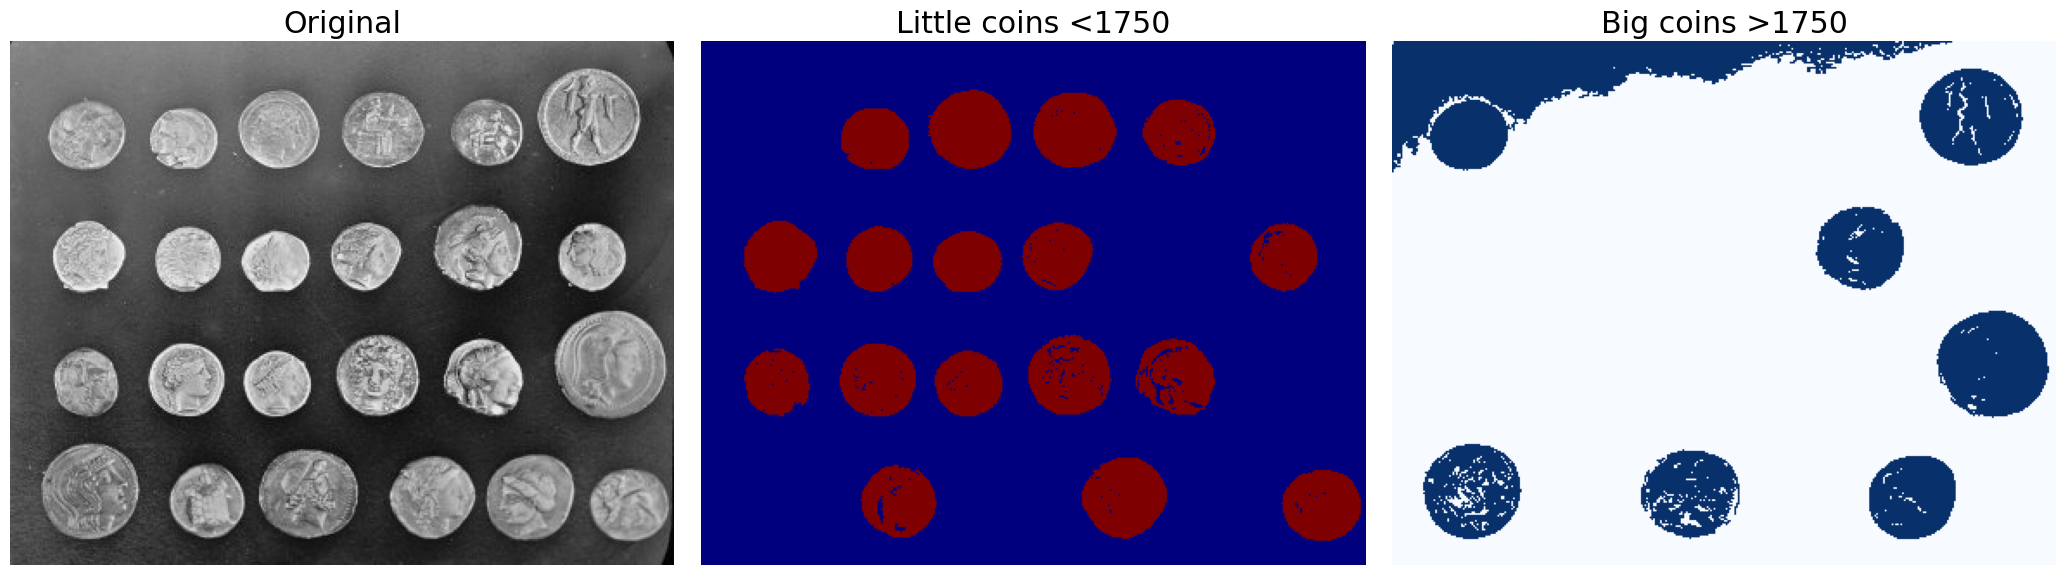

In [55]:
#Importing the needed libraries
import pandas as pd
from skimage import measure
import seaborn as sns
import matplotlib.pyplot as plt


# Extract area, major axis length and orientation from the labels
props = measure.regionprops_table(
    labels,
    properties=[
        'label',
        'area',
        'major_axis_length',
        'orientation'
    ]
)

df_features = pd.DataFrame(props)



# Identify labels for little coins <1750 and big coins >1750)
little_labels = df_features.loc[df_features['area'] < 1750, 'label'].values
big_labels    = df_features.loc[df_features['area'] > 1750, 'label'].values

# Build masks
mask_little = np.isin(labels, little_labels)
mask_big    = np.isin(labels, big_labels)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(21, 9))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(mask_little, cmap=plt.cm.jet)
ax[1].set_title('Little coins <1750')

ax[2].imshow(mask_big, cmap=plt.cm.Blues)
ax[2].set_title('Big coins >1750')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.tight_layout()
plt.show()



## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

…and the winner is GMM model G = 6


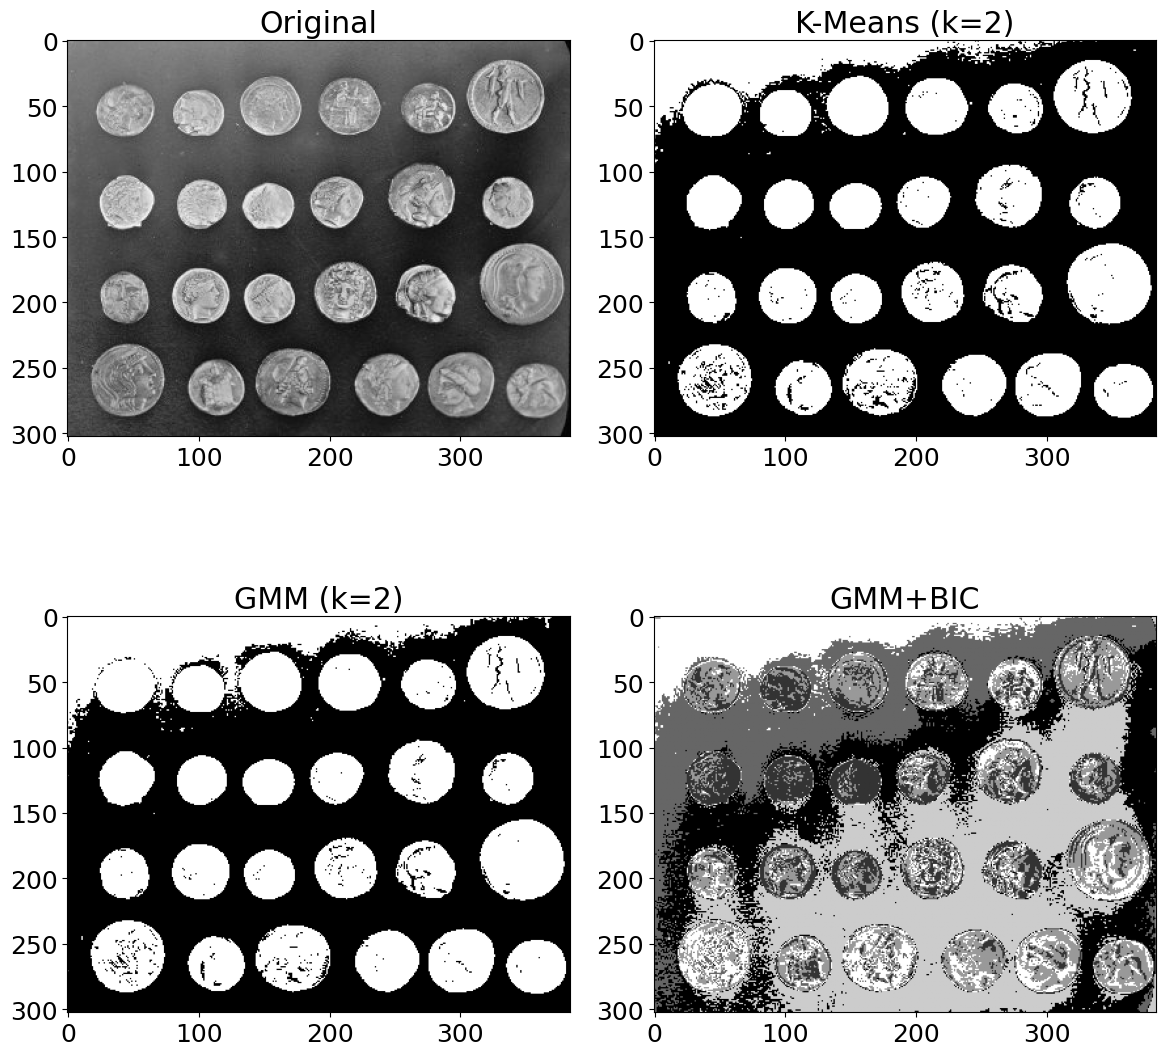

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from sklearn.cluster import KMeans
from sklearn import mixture

# Load coins image
I    = data.coins()
v_I  = I.reshape(I.shape[0]*I.shape[1], 1)

# K-Means clustering (k=2)
n_clus   = 2
kmeans   = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)
v_kmeans = kmeans.predict(v_I)
I_kmeans = v_kmeans.reshape(I.shape)

# GMM clustering (fixed k=2)
gmm      = mixture.GaussianMixture(n_components=2, random_state=0).fit(v_I)
v_gmm    = gmm.predict(v_I)
I_gmm    = v_gmm.reshape(I.shape)

# GMM + BIC model selection
NMAX   = 10
bic    = []
for kG in range(1, NMAX+1):
    gtmp = mixture.GaussianMixture(n_components=kG, covariance_type='full', random_state=0).fit(v_I)
    bic.append(gtmp.bic(v_I))


idx_winner = np.argmin(bic)
print('…and the winner is GMM model G = {}'.format(idx_winner+1))

gmm_win    = mixture.GaussianMixture(n_components=idx_winner+1, covariance_type='full', random_state=0).fit(v_I)
v_gmm_win  = gmm_win.predict(v_I)
I_gmm_win  = v_gmm_win.reshape(I.shape)

# Plot original and three segmentations
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(I, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[1].imshow(I_kmeans, cmap=plt.cm.gray)
ax[1].set_title('K-Means (k=2)')
ax[2].imshow(I_gmm, cmap=plt.cm.gray)
ax[2].set_title('GMM (k=2)')
ax[3].imshow(I_gmm_win, cmap=plt.cm.gray)
ax[3].set_title(f'GMM+BIC')

plt.tight_layout()
plt.show()


The process to do  segmentation of an RGB image using an unsupervised clustering algorithm are frist to load the image and normalize it, then choose the method and number of clusters, after that to assign labels to each pixel and finaly to visualize.

To compare the algorithms, we can conclude that for K-Means it's a fast method and gives a clean binary mask (coins white, background black) but has small dots around edges, then we have GMM similar to the previuos one but a bit smoother in shadowed areas, and finally for GMM+BIC  three intensity classes are found but not that easy to identify which one is the coin.

## 10. Extract the main texture features of this image

In [70]:
import numpy as np
import pandas as pd
from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte

#Measure regionprops with intensity
props = regionprops(labels, intensity_image=image)
n = len(props)
rows = []

# Loop over each region
for p in props:
    # crop to region bounding box
    minr, minc, maxr, maxc = p.bbox
    patch = image[minr:maxr, minc:maxc]
    # convert to uint8 [0..255]
    patch_u8 = img_as_ubyte(patch)
    # compute GLCM
    g = graycomatrix(
        patch_u8,
        distances=[1],
        angles=[0],
        levels=patch_u8.max()+1,
        symmetric=True,
        normed=True
    )
    # extract the five props
    feat = {
        'label':            p.label,
        'contrast':         graycoprops(g, 'contrast')[0,0],
        'dissimilarity':    graycoprops(g, 'dissimilarity')[0,0],
        'homogeneity':      graycoprops(g, 'homogeneity')[0,0],
        'energy':           graycoprops(g, 'energy')[0,0],
        'correlation':      graycoprops(g, 'correlation')[0,0],
    }
    rows.append(feat)

#DataFrame
df_texture = pd.DataFrame(rows)

#Results
print(df_texture)
print("\nAverage texture features:")
print(df_texture[['contrast','dissimilarity','homogeneity','energy','correlation']].mean())


    label     contrast  dissimilarity  homogeneity    energy  correlation
0       1   274.787641       7.905125     0.304399  0.032179     0.890137
1       2   995.526634      21.321429     0.086937  0.017297     0.765693
2       3   539.774746      14.253932     0.115871  0.023480     0.806299
3       4   577.133102      16.666007     0.083029  0.020208     0.784722
4       5  1028.797176      21.617458     0.076587  0.021379     0.736437
5       6   561.821053      15.009023     0.099207  0.026133     0.800590
6       7   891.572083      19.571250     0.075520  0.018196     0.845380
7       8   784.764808      17.322300     0.097732  0.022090     0.857712
8       9  1067.844278      20.778612     0.072951  0.021424     0.832012
9      10   948.079605      18.903289     0.085836  0.023050     0.873162
10     11   700.980085      15.964438     0.088606  0.024473     0.881167
11     12   886.335531      17.128205     0.099959  0.025219     0.866586
12     13   459.778478      13.575857 

## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)

In a personal way I found interesting the course and even if there was a lot of coding, the teacher knew how to give the information in a comprehensive way, and I think I got the main features and tasks to do. I did also like that we applied it and that we saw real-life examples.
